# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [1]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

In [2]:
#matplotlib.use('MacOSX')

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
# Note: Do this before importing pyplot!
%matplotlib inline

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [5]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [6]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

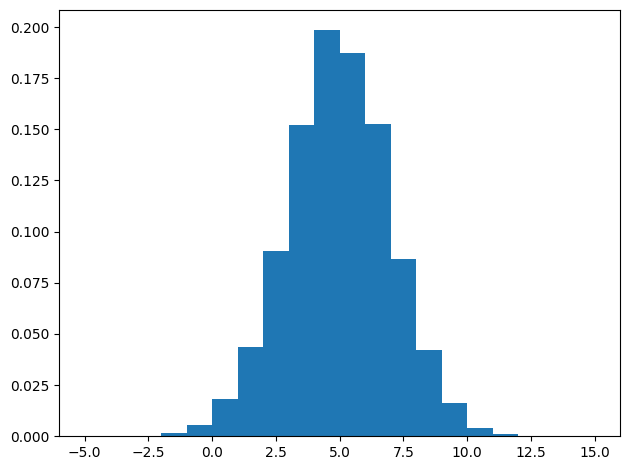

In [7]:
import time
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
#time.sleep(10)
plt.tight_layout()
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [8]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

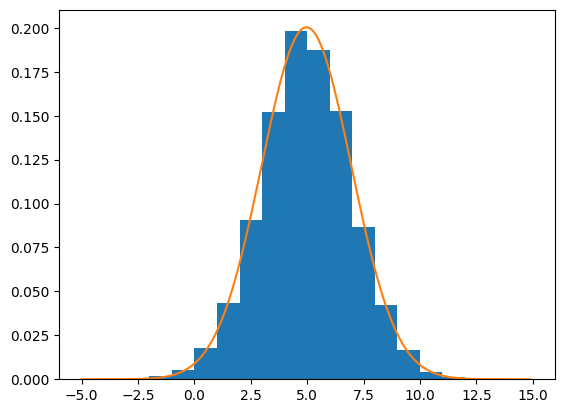

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

In [10]:
print(mu,sigma)

4.965133342027228 1.9913197001277185


let's make a bit easier to read (colors, legends, axis lables, etc..)

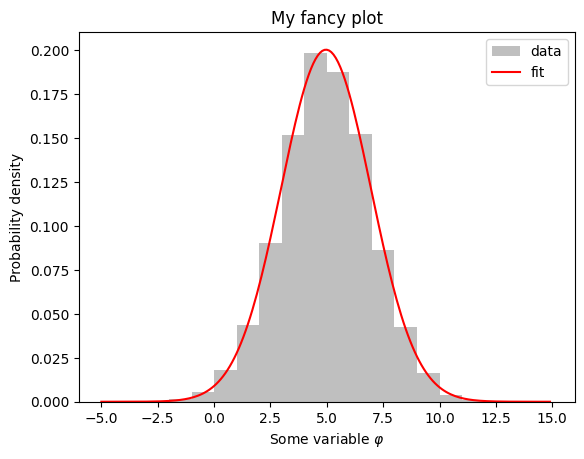

In [11]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

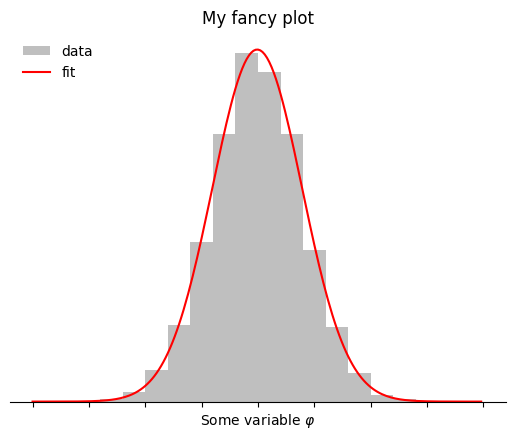

In [12]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', left=False, right=False, labelleft=False, bottom=True, top=False, labelbottom=False)
plt.show()

## 5. Saving the plot as a PDF

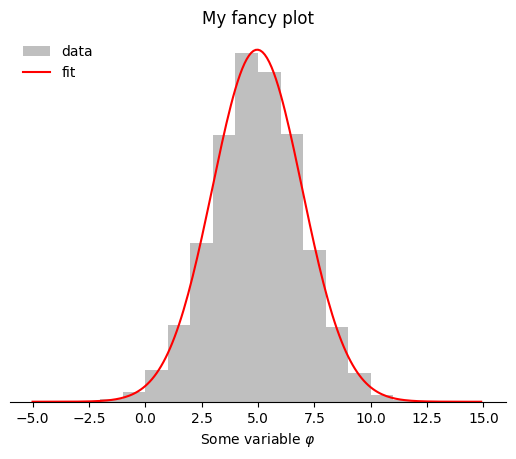

In [13]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', left=False, right=False, labelleft=False,bottom=True, top=False)
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

### My plots

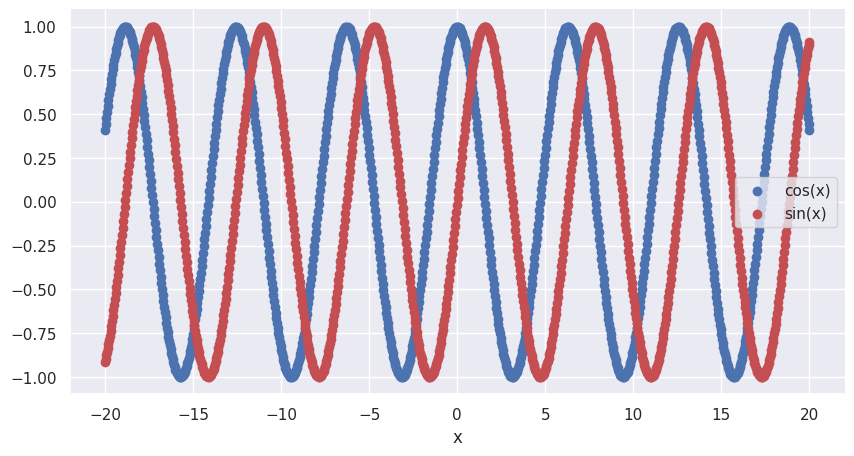

In [39]:
x = np.linspace(-20,20,1000)
cosx = np.cos(x)
sinx = np.sin(x)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, cosx, color="b", label="cos(x)")
ax.scatter(x, sinx, color="r", label="sin(x)")
ax.set_xlabel("x")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

plt.show()

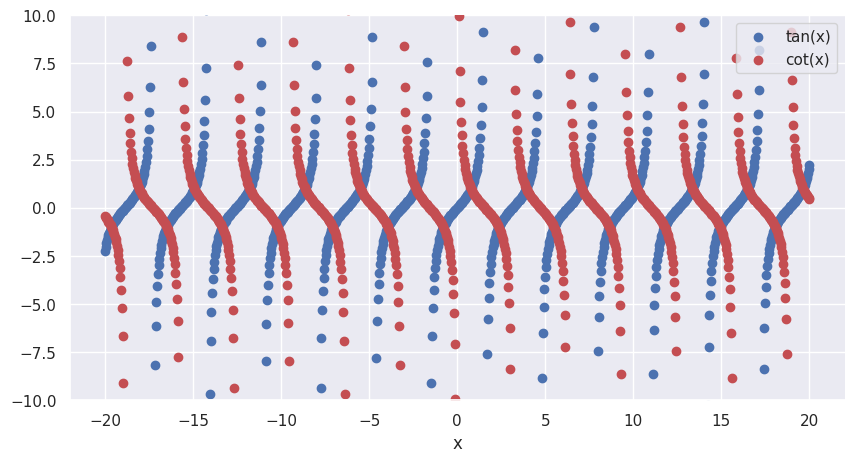

In [24]:
tanx = np.tan(x)
cotx = np.cos(x) / np.sin(x)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, tanx, color="b", label="tan(x)")
ax.scatter(x, cotx, color="r", label="cot(x)")
ax.set_xlabel("x")
ax.set_ylim([-10,10])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

/tmp/ipykernel_42205/3726436975.py:2: RuntimeWarning: divide by zero encountered in log10
  log10x = np.log10(x)
/tmp/ipykernel_42205/3726436975.py:3: RuntimeWarning: divide by zero encountered in log
  lnx    = np.log(x)


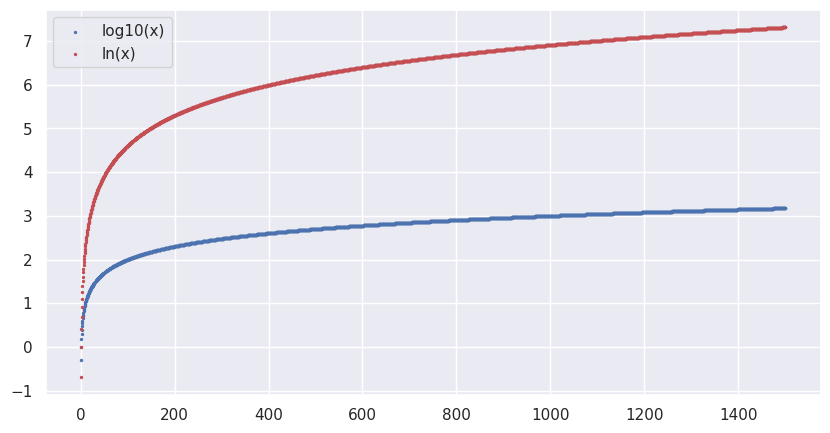

In [36]:
x      = np.linspace(0,1500,3000)
log10x = np.log10(x)
lnx    = np.log(x)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, log10x, s=2, color="b", label="log10(x)")
ax.scatter(x, lnx, s=2, color="r", label="ln(x)")
ax.legend()
plt.show()

In [16]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

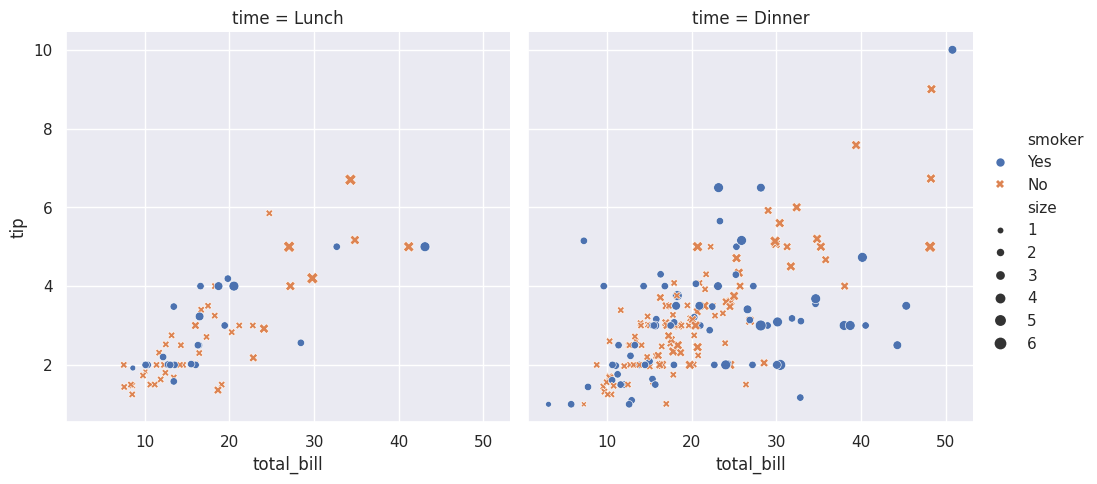

In [37]:
# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

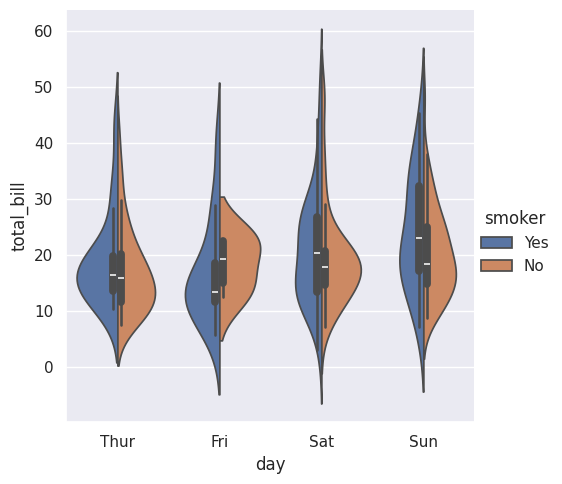

In [18]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

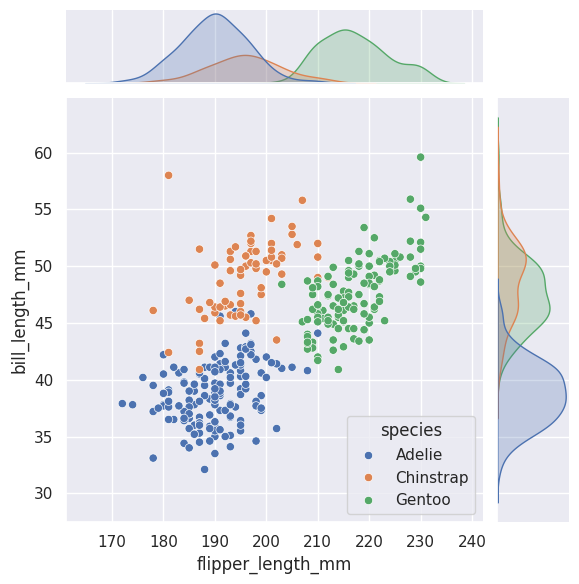

In [19]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

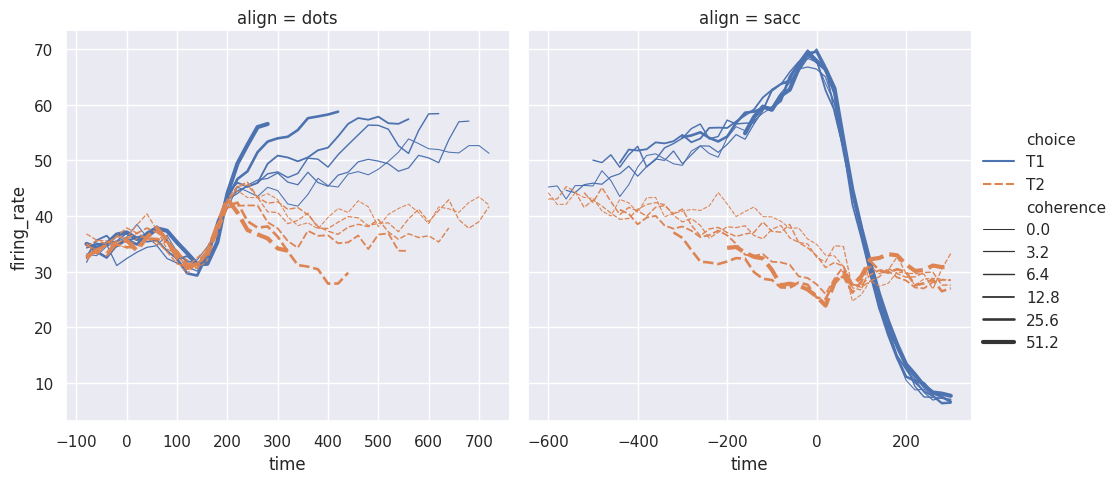

In [20]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)